In [112]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

    DATASET 1 DATA EXLORATION:

In [2]:
# read in dataset 1:

df = pd.read_csv('../data/dream_data/SubCh1_TrainingData.csv')
df.head()

,Sample_Name,Isolate,Timepoint,Treatment,BioRep,MAL1.465720.465873.bc..rv..,MAL1.48287.48430....kr...can,MAL1.562126.562246.bc..r...,MAL1.59416.59687....kr...can,MAL1.616633.616682.......y.,...,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479700,PF3D7_1479800,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100,DHA_IC50
0,isolate_01.24HR.DHA.BRep1,isolate_01,24HR,DHA,BRep1,0.008286,-0.959492,0.206468,-0.443936,0.453030,...,-0.540993,-3.674097,-1.652979,-2.255490,-4.554757,-0.381422,-1.415857,-4.121011,-2.486528,2.177
1,isolate_01.24HR.DHA.BRep2,isolate_01,24HR,DHA,BRep2,-0.872028,-1.968558,-2.308563,-1.186611,0.508575,...,0.450649,-4.464408,-0.977954,-2.012559,-4.538550,-2.333890,-2.342496,-4.774197,-1.794568,2.177
2,isolate_01.24HR.UT.BRep1,isolate_01,24HR,UT,BRep1,0.039480,-1.291371,-0.946661,-0.538092,-1.778501,...,1.411557,-5.500522,-1.764229,-1.947208,-5.331037,-0.814417,-2.141285,-3.922684,-2.495169,2.177
3,isolate_01.24HR.UT.BRep2,isolate_01,24HR,UT,BRep2,0.125177,-1.462758,-1.888105,-0.828352,-1.410803,...,-0.659519,-5.011207,-0.559471,-2.266763,-5.289318,-2.949869,-2.206432,-4.324299,-1.735312,2.177
4,isolate_01.6HR.DHA.BRep1,isolate_01,6HR,DHA,BRep1,1.354956,-2.139128,-0.541696,-1.481881,-0.735798,...,-1.687048,-4.773306,-0.048847,-2.023727,-4.398358,-3.080500,-0.566545,-4.798190,-0.821690,2.177


In [3]:
# quick look at whats in the df:
print("Dataframe 1 shape: ", df.shape)
print("Na values in df: ", df.isna().sum().sum())

Dataframe 1 shape:  (272, 5546)
Na values in df:  0


In [4]:
dfmean = df.groupby(["Isolate", "Timepoint", "Treatment"], as_index=False).mean()
dfmean.head()

,Isolate,Timepoint,Treatment,MAL1.465720.465873.bc..rv..,MAL1.48287.48430....kr...can,MAL1.562126.562246.bc..r...,MAL1.59416.59687....kr...can,MAL1.616633.616682.......y.,MAL10.1139073.1139243....kr,MAL10.258733.258825.b...r..,...,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479700,PF3D7_1479800,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100,DHA_IC50
0,isolate_01,24HR,DHA,-0.431871,-1.464025,-1.051048,-0.815274,0.480802,-0.038627,1.204591,...,-0.045172,-4.069253,-1.315467,-2.134024,-4.546653,-1.357656,-1.879177,-4.447604,-2.140548,2.177
1,isolate_01,24HR,UT,0.082329,-1.377065,-1.417383,-0.683222,-1.594652,0.981882,2.188736,...,0.376019,-5.255864,-1.161850,-2.106986,-5.310177,-1.882143,-2.173858,-4.123492,-2.115240,2.177
2,isolate_01,6HR,DHA,0.568441,-1.603999,-0.991081,-1.150271,-0.873965,-0.011228,2.126235,...,-1.440271,-2.355211,-0.179037,-1.793815,-4.015618,-2.663183,-1.014615,-4.749598,-1.220038,2.177
3,isolate_01,6HR,UT,1.154536,-1.583729,-1.629632,-1.432966,-0.856157,0.297043,1.797396,...,-0.400081,-5.743631,0.410092,-1.006793,-4.283753,-1.322741,-2.058905,-4.800885,-2.434902,2.177
4,isolate_02,24HR,DHA,0.146128,-1.584068,-1.300672,-1.163429,0.207090,-0.051022,2.051038,...,0.514673,-2.817782,-1.488630,-2.074266,-5.073159,-2.485936,-1.847990,-4.421766,-1.321384,1.697


In [5]:
# Normalize expression data across each gene:
df_norm = pd.concat([dfmean.iloc[:,:3], dfmean.iloc[:,3:-1].apply(lambda x: (x - np.mean(x))/np.std(x))], axis = 1)
df_norm.insert(3, 'DHA_IC50', dfmean[['DHA_IC50']])
df_norm.head()

,Isolate,Timepoint,Treatment,DHA_IC50,MAL1.465720.465873.bc..rv..,MAL1.48287.48430....kr...can,MAL1.562126.562246.bc..r...,MAL1.59416.59687....kr...can,MAL1.616633.616682.......y.,MAL10.1139073.1139243....kr,...,PF3D7_1479000,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479700,PF3D7_1479800,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100
0,isolate_01,24HR,DHA,2.177,-1.572063,0.149176,0.173243,0.464785,0.997961,-1.227013,...,0.241536,-0.017240,-0.336193,-0.504322,-0.558398,0.627186,1.158015,-0.200016,0.041637,-0.688898
1,isolate_01,24HR,UT,2.177,-0.114184,0.392518,-0.633057,0.910269,-1.755018,2.436279,...,-0.092361,0.556638,-1.278874,-0.279746,-0.491811,-0.481729,0.505046,-0.841334,0.579120,-0.640790
2,isolate_01,6HR,DHA,2.177,1.264062,-0.242517,0.305228,-0.665349,-0.799066,-1.128657,...,-0.792290,-1.918080,1.025494,1.157052,0.279410,1.398444,-0.467323,1.681534,-0.459167,1.060911
3,isolate_01,6HR,UT,2.177,2.925783,-0.185794,-1.100214,-1.619037,-0.775444,-0.022068,...,-0.111007,-0.500809,-1.666370,2.018315,2.217544,1.009014,1.201483,-0.591160,-0.544216,-1.248438
4,isolate_02,24HR,DHA,1.697,0.066701,-0.186743,-0.376177,-0.709737,0.634895,-1.271505,...,0.129714,0.745555,0.658013,-0.757474,-0.411236,-0.137492,-0.246656,-0.132146,0.084485,0.868260


In [6]:
## make masks to call unperturbed and perturbed samples individually

mask_dha = dfmean['Treatment'] == 'DHA'
mask_ut = dfmean['Treatment'] == 'UT'

In [7]:
## calculate mean and st.dev expression for each gene for DHA and UT samples seperately -- append to end of each column

idx_rename = {'mean':'dha_mean','std':'dha_std'}
compare_dha = df_norm[mask_dha].agg(['mean', 'std'])
compare_dha.rename(index = idx_rename, inplace = True)

idx_rename = {'mean':'ut_mean','std':'ut_std'}
compare_ut = df_norm[mask_ut].agg(['mean','std'])
compare_ut.rename(index = idx_rename, inplace = True)


compare = pd.concat([compare_dha, compare_ut], sort = False).drop("DHA_IC50", axis = 1)

In [8]:
## sanity check:
print("Normalized dataframe shape: ", df_norm.shape)
print("Comparison dataframe shape: ", compare.shape)

## checks out!

Normalized dataframe shape:  (120, 5544)
Comparison dataframe shape:  (4, 5540)


In [9]:
# run a welchs t-test to evaluate the difference in expression levels between treated and untreated for each gene
# (function runs across each column in the dataframe)

def welch_t_test(col):
    return (
        (col.loc['dha_mean'] - col.loc['ut_mean']) / 
        np.sqrt(
            col.loc['dha_std']**2/mask_dha.sum() + col.loc['ut_std']**2/mask_ut.sum()
        )
    )

In [10]:
idx_rename = {0:'dha_mean', 1:'dha_std', 2:'ut_mean', 3:'ut_std', 4:'ttest'} 

compare = compare.append(compare.apply(welch_t_test), ignore_index = True, sort = False)
compare.rename(index = idx_rename, inplace = True)
#compare.sort_values(by = "ttest", axis = 1, inplace = True)

In [11]:
# builds mask for top 50 and top 100 differentially expressed genes between perturbed and unperterbed samples
sample_idx = ["Isolate", "Timepoint", "Treatment", "DHA_IC50"]
top50 = pd.concat([compare.loc['ttest'].nlargest(n = 25, keep = 'all'), 
                   compare.loc['ttest'].nsmallest(n = 25, keep = 'all')], axis = 0)
top100 = pd.concat([compare.loc['ttest'].nlargest(n = 50, keep = 'all'), 
                   compare.loc['ttest'].nsmallest(n = 50, keep = 'all')], axis = 0)

In [12]:
# make dfs with these top 50 and 100 genes
df50 = pd.concat([df_norm[sample_idx], df_norm[top50.index]], axis = 1)
df100 = pd.concat([df_norm[sample_idx], df_norm[top100.index]], axis = 1)

In [13]:
## save a list of these top 50 genes
ds1_top50 = top50.index 

In [14]:
# save a list of these top 50 genes
pd.DataFrame(df50.columns[4:]).to_csv("correlation_features_ch1.csv")

In [15]:
# sanity check
print("Top 50 differentially expressed genes: ", df50.shape)
print("Top 100 differentially expressed genes: ", df100.shape)

Top 50 differentially expressed genes:  (120, 54)
Top 100 differentially expressed genes:  (120, 104)


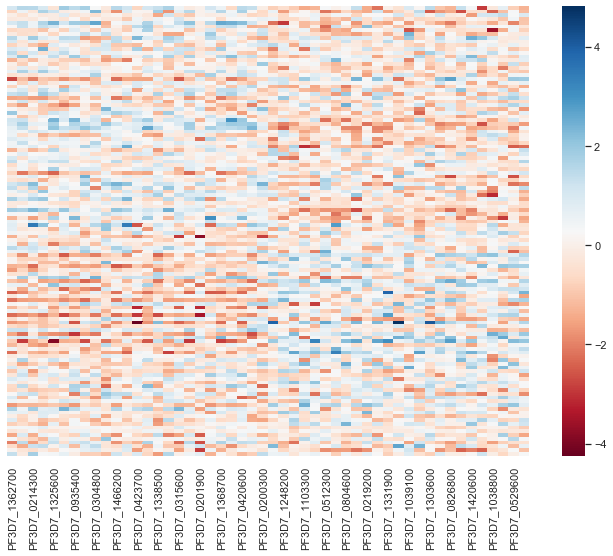

In [16]:
## plot the top 50 df with samples seperated by treatment condition

sns.heatmap(pd.concat([df50[df50["Treatment"] == "DHA"].drop(sample_idx, axis = 1), 
                       df50[df50["Treatment"] == "UT"].drop(sample_idx, axis = 1)]), 
            yticklabels=False, cmap = 'RdBu')
plt.show()
#df_group = df_norm.set_index('Sample_Name').groupby(['Timepoint','Treatment','Isolate'])

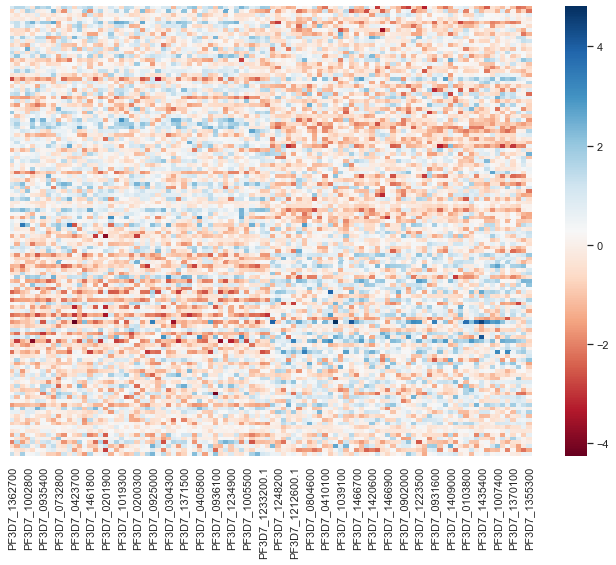

In [17]:
## plot the top 50 df with samples seperated by treatment condition

sns.heatmap(pd.concat([df100[df100["Treatment"] == "DHA"].drop(sample_idx, axis = 1), 
                       df100[df100["Treatment"] == "UT"].drop(sample_idx, axis = 1)]), 
            yticklabels=False, cmap = 'RdBu')
plt.show()

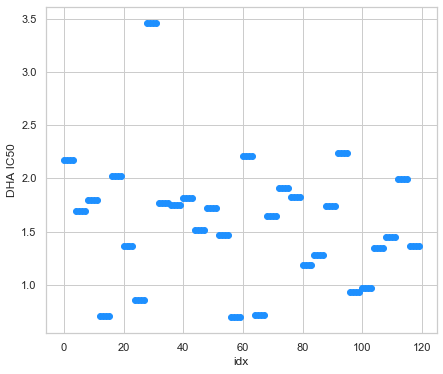

In [18]:
## Take a look at outcome variable: DHA IC50:

plt.figure(figsize = (7,6))
plt.scatter(dfmean.index, dfmean['DHA_IC50'], color = "dodgerblue")
plt.xlabel("idx")
plt.ylabel("DHA IC50")
plt.show()

In [19]:
df["DHA_IC50"].var()

0.28559082812242237

    DATASET 1 MODELING:

In [20]:
# convert timepoint column into integer
def time_convert(i):
    if i == "24HR":
        time = 24
    else:
        time = 6
    return time

            
dfmean["Timepoint"] = dfmean["Timepoint"].apply(time_convert)

In [21]:
# encode perturbation variable:
dfmean["Treatment"] = dfmean["Treatment"].astype('category').cat.codes

In [167]:
# make numpy objects:
features = dfmean.iloc[:,1:-1].to_numpy()
labels = dfmean["DHA_IC50"].to_numpy()

# sanity check:
print("Feature frame size: ", features.shape)
print("Label frame size: ", labels.shape)


# split data into training and test set -- here I held 25% as my test set
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

Feature frame size:  (120, 5542)
Label frame size:  (120,)
(90, 5542)
(30, 5542)
(90,)
(30,)


Try out a bunch of models:

In [23]:
## L1 regression (Lasso):
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=0.5, max_iter = 500).fit(x_train, y_train)
lasso.score(x_test, y_test)

-0.001428799782112744

In [24]:
## L2 regression cross-validated model (Ridge):
from sklearn.linear_model import RidgeCV

ll2 = RidgeCV(alphas=(0.1, 1.0, 10.0)).fit(x_train, y_train) 
ll2.score(x_test, y_test) ## this returns an r2 score

# Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
#       normalize=False, random_state=None, solver='auto', tol=0.001)

-1.0259340432439599

In [25]:
## Bayesian ridge:
from sklearn.linear_model import BayesianRidge

b_ridge = linear_model.BayesianRidge(n_iter = 500).fit(x_train, y_train)
b_ridge.score(x_test, y_test)

-1.1615634282366218

In [26]:
## SVM model:
from sklearn.svm import SVR

SVR = SVR(kernel = "rbf", gamma='scale', C=5.0, epsilon=0.1).fit(x_train, y_train)
print(SVR.score(x_test, y_test))  ## this returns an r2 score
y_pred = SVR.predict(x_test)


#scores = cross_val_score(rfr, feature_train, label_train, cv=10, scoring='r2')

-0.35967127073700866


In [29]:
## SVM tuning function:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

def svr_model(X, y):
    # Perform Grid-Search
    gsc = GridSearchCV(
        estimator=SVR(),
        param_grid={
            'kernel': ('rbf', 'linear', 'sigmoid'),
            'gamma': ('scale','auto'),
            'C': (0.5, 1, 10),
        },
        cv=5, verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    svr = SVR(kernel=best_params["kernel"], 
              gamma=best_params["gamma"],
              C=best_params["C"]) # Perform K-Fold CV
    score = cross_val_score(svr, X, y, cv=10).mean()

    return score, best_params

svr_model(features, labels)

(-1.361556910181731, {'C': 0.5, 'gamma': 'auto', 'kernel': 'rbf'})

In [30]:
## SVM model:

svr = SVR(kernel = "rbf", gamma='auto', C=0.5).fit(x_train, y_train)
print(svr.score(x_test, y_test) ) ## this returns an r2 score


-0.05300284029875746


In [32]:
len(svr.support_)

83

In [33]:
## KNN tuning function:
from sklearn.neighbors import KNeighborsRegressor

def knr_model(X, y):
    # Perform Grid-Search
    gsc = GridSearchCV(
        estimator=KNeighborsRegressor(),
        param_grid={
            'n_neighbors': range(2,12),
            'weights': ('uniform', 'distance'),
        },
        cv=5, verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    knr = KNeighborsRegressor(n_neighbors=best_params["n_neighbors"], weights=best_params["weights"]) # Perform K-Fold CV
    score = cross_val_score(knr, X, y, cv=10).mean()

    return score, best_params

knr_model(features, labels)

(-1.7928478626876347, {'n_neighbors': 11, 'weights': 'distance'})

In [34]:
## KNN model:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=11).fit(x_train, y_train)
print(knr.score(x_test, y_test) ) ## this returns an r2 score
y_pred = knr.predict(x_test)


-0.11130066152266505


In [39]:
# random forest first swing at parameters:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 100, max_features = "sqrt",
                            max_depth = 8,
                            bootstrap = True).fit(x_train, y_train)

print("Test data r2 score: ", rfr.score(x_test, y_test)) ## this returns an r2 score

y_pred = rfr.predict(x_test)

Test data r2 score:  -0.14779547733315024


In [36]:
## random forest tuning function:

def rfr_model(X, y):
    # Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,10),
            'n_estimators': (25, 50, 100, 250),
            'max_features': ("auto", "sqrt")
        },
        cv=5, scoring='neg_mean_squared_error', 
        verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],
                                random_state=False, verbose=False) # Perform K-Fold CV
    score = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error').mean()

    return score, best_params

rfr_model(features, labels)

(-0.46528672747362754,
 {'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100})

In [37]:
## look at random forest regression feature importances!!

print("Number of features in fitted model: ", rfr.n_features_)
print("Feature Importances: ", rfr.feature_importances_)

Number of features in fitted model:  5542
Feature Importances:  [0. 0. 0. ... 0. 0. 0.]


In [38]:
np.count_nonzero(rfr.feature_importances_)

1434

Above models didn't generate a single positive R2 value. Trying feature selection next

In [40]:
# start with top 50 most important random forest features:

# select features:
top50_rforestA = df.drop(["Sample_Name", "Isolate", "BioRep", "DHA_IC50"], 
                        axis = 1).columns[np.argsort(rfr.feature_importances_)[5492:5542]]


# apply to x_train and x_test data:
x_train_rf50 = x_train[:,np.argsort(rfr.feature_importances_)[5492:5542]]
x_test_rf50 = x_test[:,np.argsort(rfr.feature_importances_)[5492:5542]]

print(x_train_rf50.shape)
print(x_test_rf50.shape)
print(y_train.shape)
print(y_test.shape)

(90, 50)
(30, 50)
(90,)
(30,)


In [41]:
## L1 regression (Lasso):

lasso = linear_model.Lasso(alpha=0.5, max_iter = 500).fit(x_train_rf50, y_train)
lasso.score(x_test_rf50, y_test)

-0.001428799782112744

In [42]:
## L2 regression cross-validated model (Ridge):

ll2 = RidgeCV(alphas=(0.1, 1.0, 10.0)).fit(x_train_rf50, y_train) 
ll2.score(x_test_rf50, y_test) ## this returns an r2 score

# Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
#       normalize=False, random_state=None, solver='auto', tol=0.001)

-0.15068131298017873

In [43]:
## Bayesian ridge:

b_ridge = linear_model.BayesianRidge(n_iter = 500).fit(x_train_rf50, y_train)
b_ridge.score(x_test_rf50, y_test)

-0.002701207686544249

In [44]:
## run SVR model tuning function:
svr_model(x_train_rf50, y_train)

(-0.19879435844896845, {'C': 0.5, 'gamma': 'scale', 'kernel': 'rbf'})

In [45]:
## SVM model:

svr = SVR(kernel = "rbf", gamma='auto', C=0.5).fit(x_train_rf50, y_train)
print(svr.score(x_test_rf50, y_test) ) ## this returns an r2 score

-0.03246442015633799


In [46]:
## run KNN model tuning function:
knr_model(x_train_rf50, y_train)

(-0.24883513448795452, {'n_neighbors': 11, 'weights': 'uniform'})

In [47]:
## KNN model:

knr = KNeighborsRegressor(n_neighbors=11, weights = "distance").fit(x_train_rf50, y_train)
print(knr.score(x_test_rf50, y_test) ) ## this returns an r2 score

-0.16067113252896292


In [48]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

0.5250768245990801

In [49]:
## run random forest model tuning:
rfr_model(x_train_rf50, y_train)

(-0.4312482312476809,
 {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 25})

In [52]:
# random forest model:

rfr = RandomForestRegressor(n_estimators = 50,
                            max_depth = 3,
                            max_features = "sqrt",
                            bootstrap = True).fit(x_train_rf50, y_train)

print("Test data r2 score: ", rfr.score(x_test_rf50, y_test)) ## this returns an r2 score

Test data r2 score:  -0.20695264342083752


In [53]:
mean_absolute_error(y_test, y_pred)

0.5250768245990801

Random forest selected features didn't generate any positive R2 scores either.
Next Trying out recursive features selection:

In [168]:
## recursive feature selection:
from sklearn.feature_selection import RFE

# Create the RFE object and rank each feature
#rf = RandomForestRegressor(n_estimators = 100, bootstrap = True, max_features = 'sqrt')
b_ridge = linear_model.BayesianRidge(n_iter = 500)

rfs100 = RFE(estimator=b_ridge, step=20, n_features_to_select = 100).fit(features, labels)

rfs100.n_features_

100

In [169]:
## save names of top 100 features selected by rfe for model 1

m1_rfe_features = dfmean.iloc[:,1:-1].columns[rfs100.support_]

In [55]:
# generate feature array with top 100 feautures:

features_rfs100 = features[:,rfs100.support_]

print("Feature frame size: ", features_rfs100.shape)
print("Label frame size: ", labels.shape)

Feature frame size:  (120, 100)
Label frame size:  (120,)


In [56]:
# sanity check:
print("Feature frame size: ", features.shape)
print("Label frame size: ", labels.shape)

# split data into training and test set -- continue holding out 25% as test set
x_train_rfs100, x_test_rfs100, y_train_rfs100, y_test_rfs100 = train_test_split(
    features[:,rfs100.support_], 
    labels, 
    test_size=0.25)

print(x_train_rfs100.shape)
print(x_test_rfs100.shape)
print(y_train_rfs100.shape)
print(y_test_rfs100.shape)

Feature frame size:  (120, 5542)
Label frame size:  (120,)
(90, 100)
(30, 100)
(90,)
(30,)


In [57]:
## L1 regression (Lasso):

lasso = linear_model.Lasso(alpha=0.5, max_iter = 500).fit(x_train_rfs100, y_train_rfs100)
lasso.score(x_test_rfs100, y_test_rfs100)

-0.007587957228985642

In [58]:
## take a look at predictors as well as R2 score from model generated with cross validation
## (cross validated models are build on the complete dataset)

from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge

ridge = linear_model.Ridge(alpha = 0.1)
y_pred = cross_val_predict(ridge, features_rfs100, labels, cv=5)
score = cross_val_score(ridge, features_rfs100, labels, cv=5).mean()

In [59]:
print(score)
print(mean_absolute_error(labels, y_pred))

0.8976431818845458
0.10946002410955051


GENERATED A POSITIVE R2 SCORE!

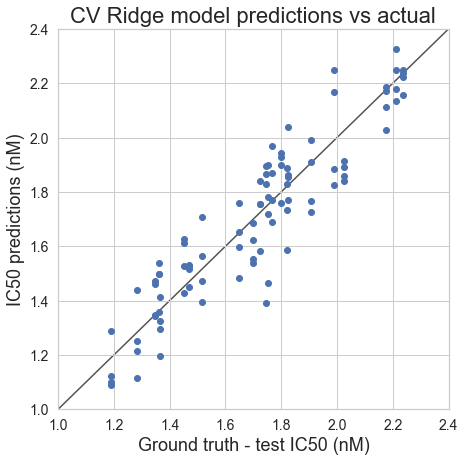

In [60]:
x = np.linspace(0,4,10)
plt.figure(figsize = (7, 7))
plt.scatter(labels, y_pred)
plt.plot(x, x, 'k-', alpha=0.75, zorder=0)
plt.xlabel("Ground truth - test IC50 (nM)", fontsize = 18)
plt.ylabel("IC50 predictions (nM)", fontsize = 18)
plt.ylim(1, 2.4)
plt.xlim(1, 2.4)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.title("CV Ridge model predictions vs actual", fontsize = 22)
plt.show()

In [61]:
# try out same model with bayesian ridge:
# (cross validated models are build on the complete dataset)

b_ridge = linear_model.BayesianRidge(n_iter = 500)

y_pred = cross_val_predict(b_ridge, features_rfs100, labels, cv=5)
score = cross_val_score(b_ridge, features_rfs100, labels, cv=5).mean()

print(score)
print(mean_absolute_error(labels, y_pred))

0.889482870204386
0.11180523368658295


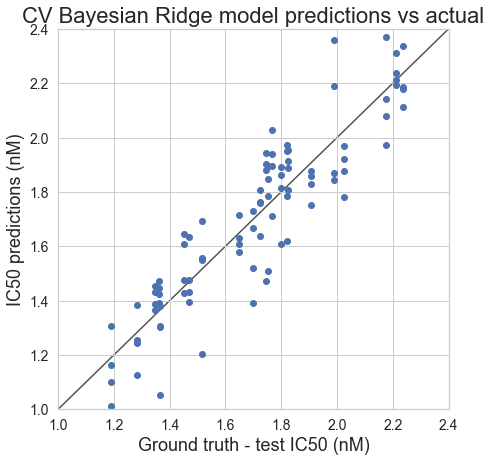

In [62]:
x = np.linspace(0,4,10)
plt.figure(figsize = (7, 7))
plt.scatter(labels, y_pred)
plt.plot(x, x, 'k-', alpha=0.75, zorder=0)
plt.xlabel("Ground truth - test IC50 (nM)", fontsize = 18)
plt.ylabel("IC50 predictions (nM)", fontsize = 18)
plt.ylim(1, 2.4)
plt.xlim(1, 2.4)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.title("CV Bayesian Ridge model predictions vs actual", fontsize = 22)
plt.show()

In [63]:
## L2 regression cross-validated model (Ridge):
## build L2 model on train set to test on test set; this also generates a good model

ll2 = RidgeCV(alphas=(0.1, 1.0, 10.0)).fit(x_train_rfs100, y_train_rfs100) 

y_pred = ll2.predict(x_test_rfs100)
ll2.score(x_test_rfs100, y_test_rfs100) ## this returns an r2 score

# Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
#       normalize=False, random_state=None, solver='auto', tol=0.001)

0.8808706099200574

In [64]:
ll2.alpha_

0.1

In [65]:
mean_absolute_error(y_test_rfs100, y_pred)

0.1477708202673636

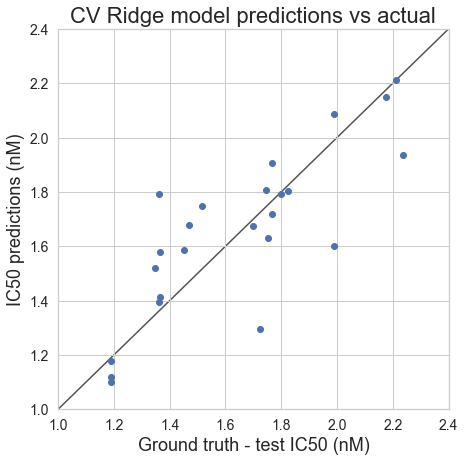

In [66]:
x = np.linspace(0,4,10)
plt.figure(figsize = (7, 7))
plt.scatter(y_test_rfs100, y_pred)
plt.plot(x, x, 'k-', alpha=0.75, zorder=0)
plt.xlabel("Ground truth - test IC50 (nM)", fontsize = 18)
plt.ylabel("IC50 predictions (nM)", fontsize = 18)
plt.ylim(1, 2.4)
plt.xlim(1, 2.4)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.title("CV Ridge model predictions vs actual", fontsize = 22)
plt.show()

In [67]:
## Bayesian ridge:
b_ridge = linear_model.BayesianRidge(n_iter = 500).fit(x_train_rfs100, y_train_rfs100)

y_pred = b_ridge.predict(x_test_rfs100)
b_ridge.score(x_test_rfs100, y_test_rfs100)

0.9095425827219517

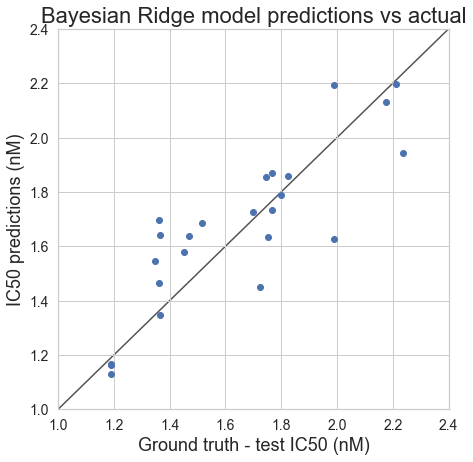

In [68]:
x = np.linspace(0,4,10)
plt.figure(figsize = (7, 7))
plt.scatter(y_test_rfs100, y_pred)
plt.plot(x, x, 'k-', alpha=0.75, zorder=0)
plt.xlabel("Ground truth - test IC50 (nM)", fontsize = 18)
plt.ylabel("IC50 predictions (nM)", fontsize = 18)
plt.ylim(1, 2.4)
plt.xlim(1, 2.4)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.title("Bayesian Ridge model predictions vs actual", fontsize = 22)
plt.show()

In [69]:
mean_absolute_error(y_test_rfs100, y_pred)

0.13461928645221477

In [70]:
# try out SVR tuning here:
svr_model(x_train_rfs100, y_train)

(-0.07554827873599722, {'C': 0.5, 'gamma': 'scale', 'kernel': 'rbf'})

In [72]:
## SVM model:

svr = SVR(kernel = "linear", gamma='auto', C=0.5).fit(x_train_rfs100, y_train)
print(svr.score(x_test_rfs100, y_test) ) ## this returns an r2 score

-1.356216688940925


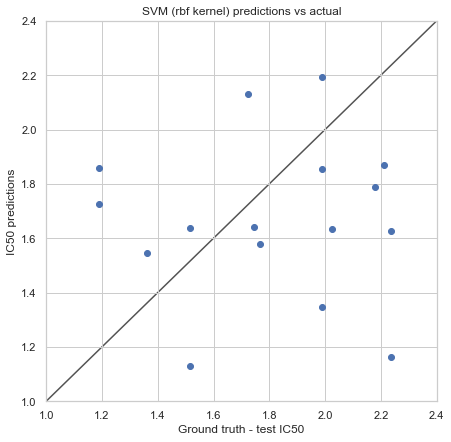

In [73]:
x = np.linspace(0,4,10)
plt.figure(figsize = (7, 7))
plt.scatter(y_test, y_pred)
plt.plot(x, x, 'k-', alpha=0.75, zorder=0)
plt.xlabel("Ground truth - test IC50")
plt.ylabel("IC50 predictions")
plt.ylim(1, 2.4)
plt.xlim(1, 2.4)
plt.title("SVM (rbf kernel) predictions vs actual")
plt.show()

In [74]:
## KNN model tuning:
knr_model(x_train_rfs100, y_train)

(-0.2949873052292718, {'n_neighbors': 6, 'weights': 'distance'})

In [75]:
## KNN model:

knr = KNeighborsRegressor(n_neighbors=11, weights = "distance").fit(x_train_rfs100, y_train)
print(knr.score(x_test_rfs100, y_test) ) ## this returns an r2 score

-0.029494155320093137


In [76]:
# try RFE with just the top 50 features to see how it compares:
b_ridge = linear_model.BayesianRidge(n_iter = 500)

rfs50 = RFE(estimator=b_ridge, step=20, n_features_to_select = 50).fit(features, labels)

rfs50.n_features_

50

In [77]:
x_train_rfs50 = x_train[:,rfs50.support_]
x_test_rfs50 = x_test[:,rfs50.support_]

print(x_train_rfs50.shape)
print(x_test_rfs50.shape)

(90, 50)
(30, 50)


In [78]:
## L1 regression (Lasso):
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.5, max_iter = 500).fit(x_train_rfs50, y_train)
lasso.score(x_test_rfs50, y_test)

-0.001428799782112744

In [79]:
## L2 regression cross-validated model (Ridge):
from sklearn.linear_model import RidgeCV

ll2 = RidgeCV(alphas=(0.1, 1.0, 10.0)).fit(x_train_rfs50, y_train) 

y_pred = ll2.predict(x_test_rfs50)
ll2.score(x_test_rfs50, y_test) ## this returns an r2 score

# Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
#       normalize=False, random_state=None, solver='auto', tol=0.001)

0.7349019228382516

In [80]:
mean_absolute_error(y_test, y_pred)

0.23522063543663252

In [81]:
## Bayesian ridge:
b_ridge = linear_model.BayesianRidge(n_iter = 500).fit(x_train_rfs50, y_train)

y_pred = b_ridge.predict(x_test_rfs50)
b_ridge.score(x_test_rfs50, y_test)

0.7617479869181036

In [82]:
mean_absolute_error(y_test, y_pred)

0.2238048999381535

In [83]:
## SVR model tuning:

svr_model(x_train_rfs50, y_train)

(0.34873639403343093, {'C': 0.5, 'gamma': 'scale', 'kernel': 'linear'})

In [84]:
## SVM model:

svr = SVR(kernel = "linear", gamma='auto', C=0.5).fit(x_train_rfs50, y_train)
print(svr.score(x_test_rfs50, y_test) ) ## this returns an r2 score

0.7240795695981179


    Best performance generated by Ridge regression model trained on top 100 features selected with RFE

    DATASET 2 DATA EXPLORATION:

In [85]:
df2 = pd.read_csv('../data/dream_data/SubCh2_TrainingData.csv')
df2.head()

,Sample_Names,Country,Asexual.stage..hpi.,Kmeans.Grp,PF3D7_0100100,PF3D7_0100200,PF3D7_0100300,PF3D7_0100600,PF3D7_0100800,PF3D7_0101300,...,PF3D7_1478800,PF3D7_1479000,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100,ClearanceRate
0,GSM1427365,Bangladesh,20,B,0.226311,-0.396829,-1.804581,NaN,NaN,0.355761,...,-0.669221,-0.333383,-0.778371,-1.227344,0.810284,2.883478,NaN,-1.309528,-0.641710,Fast
1,GSM1427366,Bangladesh,18,B,0.554427,0.542001,-1.561573,-0.490289,0.857929,0.239295,...,NaN,-0.280644,-0.307575,0.272700,NaN,1.413178,1.830839,0.210217,-1.065533,Fast
2,GSM1427367,Bangladesh,16,B,0.587048,0.707557,-1.604587,0.176783,0.307112,0.575995,...,0.027149,-0.193596,0.192411,-0.087428,1.583775,1.819734,1.800309,0.136773,-0.736130,Fast
3,GSM1427368,Bangladesh,8,A,0.680655,-0.744063,-1.441137,0.057256,0.560016,0.279019,...,1.153596,2.548036,0.042057,0.049806,NaN,0.111910,1.201473,-0.544269,-0.530400,Fast
4,GSM1427369,Bangladesh,16,B,1.089408,-0.002673,-0.877413,NaN,0.703386,0.759510,...,-1.621761,-0.472226,-1.029073,-0.678511,NaN,0.747629,2.574896,0.377132,NaN,Fast


In [86]:
## drop any entries that don't have outcome data

output_mask = df2["ClearanceRate"].isna()
df2 = df2[~output_mask]

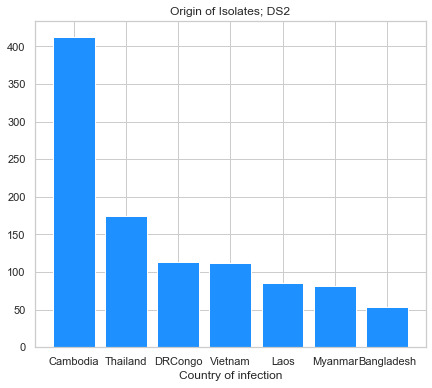

In [87]:
## take a look at the nation distribution of ds2 samples

country_freq = df2['Country'].value_counts()
country_freq.index

plt.figure(figsize = (7,6))
plt.bar(country_freq.index, country_freq, color = "dodgerblue")
plt.xlabel('Country of infection')
plt.title("Origin of Isolates; DS2")
plt.show()

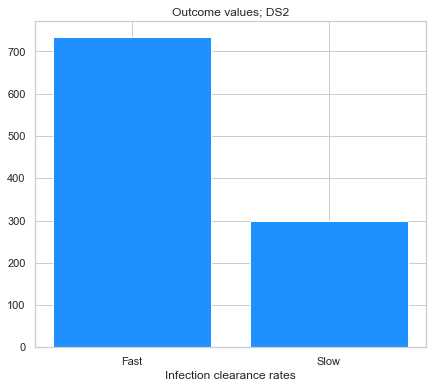

In [88]:
clearance_freq = df2['ClearanceRate'].value_counts()
clearance_freq.index

plt.figure(figsize = (7,6))
plt.bar(clearance_freq.index, clearance_freq, color = "dodgerblue")
plt.xlabel('Infection clearance rates')
plt.title("Outcome values; DS2")
plt.show()

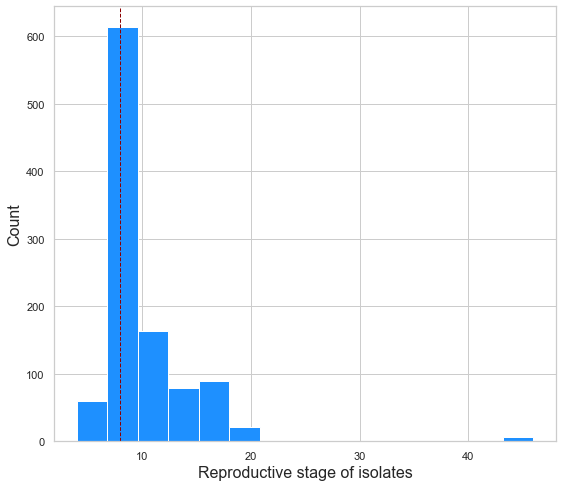

In [89]:

plt.figure(figsize = (9,8))
plt.hist(df2['Asexual.stage..hpi.'], bins = 15, color="dodgerblue")
plt.axvline(df2['Asexual.stage..hpi.'].median(), color='darkred', linestyle='dashed', linewidth=1)
plt.xlabel('Reproductive stage of isolates', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.show()

In [90]:
## look at interesection across microarrays from dataset 1 to dataset 2
ch1 = df.columns
ch2 = df2.columns
len(set(ch1).intersection(ch2))

4952

In [91]:
## encode catagorical variables

df_code = df2.copy()
df_code["Country"] = df_code["Country"].astype("category").cat.codes
df_code["Kmeans.Grp"] = df_code["Kmeans.Grp"].astype("category").cat.codes
df_code["ClearanceRate"] = df_code["ClearanceRate"].replace('Fast', 1)
df_code["ClearanceRate"] = df_code["ClearanceRate"].replace('Slow', 0)
df_code.head()

,Sample_Names,Country,Asexual.stage..hpi.,Kmeans.Grp,PF3D7_0100100,PF3D7_0100200,PF3D7_0100300,PF3D7_0100600,PF3D7_0100800,PF3D7_0101300,...,PF3D7_1478800,PF3D7_1479000,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100,ClearanceRate
0,GSM1427365,0,20,1,0.226311,-0.396829,-1.804581,NaN,NaN,0.355761,...,-0.669221,-0.333383,-0.778371,-1.227344,0.810284,2.883478,NaN,-1.309528,-0.641710,1
1,GSM1427366,0,18,1,0.554427,0.542001,-1.561573,-0.490289,0.857929,0.239295,...,NaN,-0.280644,-0.307575,0.272700,NaN,1.413178,1.830839,0.210217,-1.065533,1
2,GSM1427367,0,16,1,0.587048,0.707557,-1.604587,0.176783,0.307112,0.575995,...,0.027149,-0.193596,0.192411,-0.087428,1.583775,1.819734,1.800309,0.136773,-0.736130,1
3,GSM1427368,0,8,0,0.680655,-0.744063,-1.441137,0.057256,0.560016,0.279019,...,1.153596,2.548036,0.042057,0.049806,NaN,0.111910,1.201473,-0.544269,-0.530400,1
4,GSM1427369,0,16,1,1.089408,-0.002673,-0.877413,NaN,0.703386,0.759510,...,-1.621761,-0.472226,-1.029073,-0.678511,NaN,0.747629,2.574896,0.377132,NaN,1


In [92]:
## impute missing data

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3, weights = 'distance')
df_impute = imputer.fit_transform(df_code.iloc[:,1:-1].to_numpy())

In [93]:
## put imputed data back into a labeled pd dataframe

pd_impute = pd.DataFrame(df_impute)
pd_impute.columns = df_code.drop(["Sample_Names", "ClearanceRate"], axis = 1).columns
pd_impute = pd.concat([df_code["ClearanceRate"], pd_impute], axis = 1, join = "inner")

In [94]:
#pd_impute.to_csv('imputed_ch2_data.csv')

In [95]:
pd_impute.shape

(1025, 4956)

In [96]:
# Normalize expresssion data across each gene:
norm_plot = pd.concat([pd_impute["ClearanceRate"], pd_impute.drop(["Country", "Asexual.stage..hpi.", "Kmeans.Grp", "ClearanceRate"], 
                                                                  axis = 1).apply(lambda x: (x - np.mean(x))/np.std(x))], axis = 1)

In [97]:
# run a welchs t-test to evaluate the difference in expression levels between treated and untreated for each gene
# (function runs across each column in the dataframe)

def welch_t_test(col):
    return (
        (col.loc['fast_mean'] - col.loc['slow_mean']) / 
        np.sqrt(
            col.loc['fast_std']**2/fast_mask.sum() + col.loc['slow_std']**2/slow_mask.sum()
        )
    )

In [98]:
## Clearance Rate masks:
fast_mask = norm_plot["ClearanceRate"] == 1
slow_mask = norm_plot["ClearanceRate"] == 0

## calculate mean and st.dev expression for each gene for DHA and UT samples seperately -- append to end of each column

idx_rename = {'mean':'fast_mean','std':'fast_std'}
compare_fast = norm_plot[fast_mask].agg(['mean', 'std'])
compare_fast.rename(index = idx_rename, inplace = True)

idx_rename = {'mean':'slow_mean','std':'slow_std'}
compare_slow = norm_plot[slow_mask].agg(['mean','std'])
compare_slow.rename(index = idx_rename, inplace = True)

compare = pd.concat([compare_fast, compare_slow], sort = False).drop("ClearanceRate", axis = 1)


idx_rename = {0:'fast_mean', 1:'fast_std', 2:'slow_mean', 3:'slow_std', 4:'ttest'} 
compare = compare.append(compare.apply(welch_t_test), ignore_index = True, sort = False)
compare.rename(index = idx_rename, inplace = True)

In [99]:
## generate df of top 50 differentially expressed genes between fast and slow clearance samples
top50 = pd.concat([compare.loc['ttest'].nlargest(n = 25, keep = 'all'), 
                   compare.loc['ttest'].nsmallest(n = 25, keep = 'all')], axis = 0)

df50 = pd.concat([norm_plot["ClearanceRate"], norm_plot[top50.index]], axis = 1)

In [100]:
ds2_top50 = top50.index

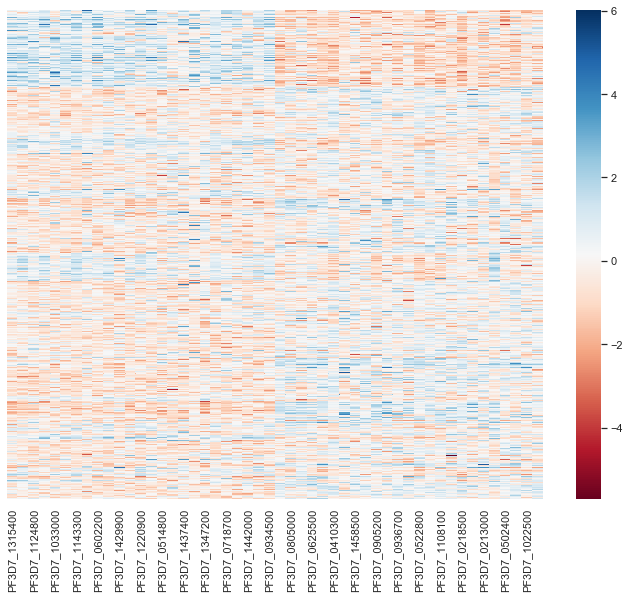

In [101]:
## generate heat map of top 50 differentially expressed genes, seperated by fast/slow clearance rates

sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(pd.concat([df50[df50["ClearanceRate"] == 1].drop("ClearanceRate", axis = 1), 
                       df50[df50["ClearanceRate"] == 0].drop("ClearanceRate", axis = 1)]), 
            yticklabels=False, cmap = 'RdBu')
plt.show()

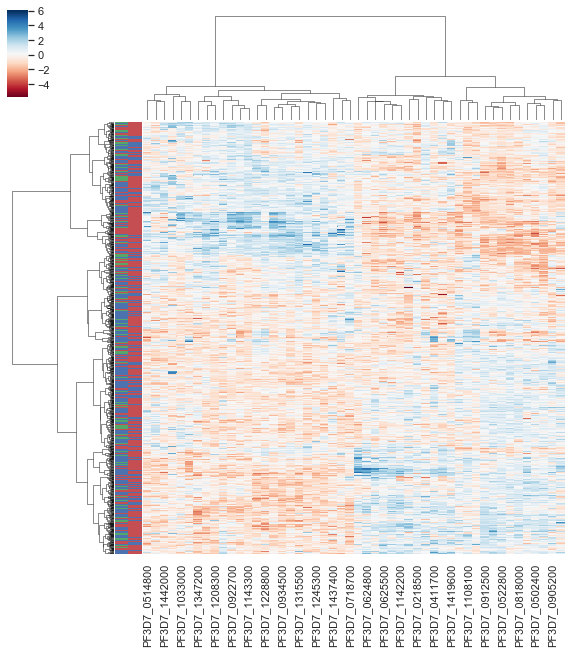

In [102]:
## look at a quick clustermap of the samples (second annotation bar)
## with the kmeans cluster data given in ds2 (first annotation bar)

cluster_map_clearance = dict(zip(pd_impute["ClearanceRate"].unique(), "rbg"))
cluster_map_cluster = dict(zip(pd_impute["Kmeans.Grp"].unique(), "rbg"))
row_colors_clearance = pd_impute["ClearanceRate"].map(cluster_map_clearance)
row_colors_cluster = pd_impute["Kmeans.Grp"].map(cluster_map_cluster)

sns.clustermap(pd.concat([df50[df50["ClearanceRate"] == 1].drop("ClearanceRate", axis = 1), 
                          df50[df50["ClearanceRate"] == 0].drop("ClearanceRate", axis = 1)]), 
               cmap = 'RdBu', row_colors=[row_colors_cluster, row_colors_clearance], method = "ward", yticklabels = False)



    DATASET 2 MODELS:

In [103]:
## generate numpy objects for train/test split

features = df_impute
outputs = df_code.iloc[:,-1].to_numpy()


print('Features DF size: ', features.shape)
print('Outputs DF size: ', outputs.shape)

Features DF size:  (1034, 4955)
Outputs DF size:  (1034,)


In [104]:
## train/test split 70/30

x_train, x_test, y_train, y_test = train_test_split(features, outputs, test_size=0.3, random_state=1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(723, 4955)
(311, 4955)
(723,)
(311,)


In [105]:
## code for generating ROC plots and confusion matricies:

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def generate_roc_plot(fpr, tpr, title='Reciever operating plot'):
    roc_auc = auc(fpr, tpr)

    # generate ROC plot:
    plt.figure(figsize = (10, 8))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize = 16)
    plt.ylabel('True Positive Rate', fontsize = 16)
    plt.title(title, fontsize = 20)
    plt.legend(loc="lower right", fontsize = 14)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.show()



def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.

    Code from scikit-learn.org
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    print(cm.shape)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(-0.5, cm.shape[0]))
    ax.set_xticklabels(["Slow", "Fast"], fontsize = 14)
    ax.set_yticklabels(["Slow", "Fast"], fontsize = 14)
    ax.set_title(title, fontsize = 20)
    ax.set_ylabel("True label", fontsize = 16)
    ax.set_xlabel("Predicted label", fontsize = 16)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black", fontsize = 16)
    fig.tight_layout()
    return ax

In [108]:
## Write Random forest classification model tuning script:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def rfc_model(X, y):
    # Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid={
            'max_depth': range(4,9),
            'n_estimators': (50, 100, 1000),
            'min_samples_split': range(2,5)
        },
        cv=5, verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfc = RandomForestClassifier(max_depth=best_params["max_depth"], 
                                 n_estimators=best_params["n_estimators"],
                                 min_samples_split = best_params["min_samples_split"],
                                 random_state=False,
                                 verbose=False) # Perform K-Fold CV
    scores = cross_val_score(rfc, X, y, cv=5)
    return scores, best_params

rfc_model(features, outputs)

(array([0.71497585, 0.73429952, 0.73429952, 0.70531401, 0.69902913]),
 {'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 100})

In [113]:
# random forest classifier:

sns.set(rc={'figure.figsize':(8,6)})

rfc = RandomForestClassifier(n_estimators = 100, bootstrap = True, max_depth = 5,
                             min_samples_split = 4,
                             max_features = 'sqrt').fit(x_train, y_train)

y_pred = rfc.predict(x_test)
y_probs = rfc.predict_proba(x_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probs[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Random Forest classifier AUC: ", roc_auc)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Random Forest classifier AUC:  0.747002997002997
Accuracy:  0.729903536977492


KNN classifier AUC:  0.7114885114885114
Accuracy:  0.7234726688102894


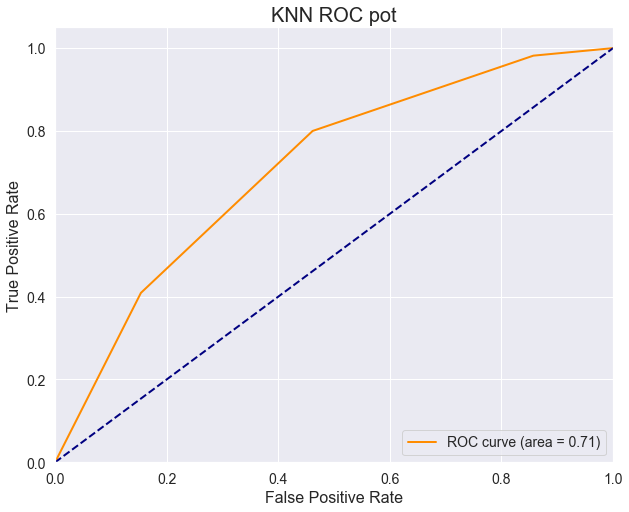

In [114]:
# and KNN classifier:
sns.set(rc={'figure.figsize':(8,6)})

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)

y_pred = knn.predict(x_test)
y_probs = knn.predict_proba(x_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probs[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
print("KNN classifier AUC: ", roc_auc)
print("Accuracy: ", accuracy_score(y_test, y_pred))
generate_roc_plot(false_positive_rate, true_positive_rate, title = "KNN ROC pot")

In [115]:
## SVM classifier tuning function:

from sklearn.svm import SVC

def svm_model(X, y):
    # Perform Grid-Search
    gsc = GridSearchCV(
        estimator=SVC(),
        param_grid={
            'C': (0.5, 1, 10),
            'gamma': ("scale", "auto")
        },
        cv=5, verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    svc = SVC(C=best_params["C"],
              gamma=best_params["gamma"],
              verbose=False) # Perform K-Fold CV
    scores = cross_val_score(svc, X, y, cv=10)

    return scores, best_params

svm_model(features, outputs)

(array([0.71153846, 0.71153846, 0.70192308, 0.71153846, 0.73786408,
        0.66019417, 0.70873786, 0.70873786, 0.65048544, 0.72815534]),
 {'C': 0.5, 'gamma': 'scale'})

In [116]:
# SVM Linear kernel next:
from sklearn.svm import SVC

svm = SVC(C = 0.5, kernel = "linear", gamma='scale').fit(x_train, y_train)

y_scores = svm.decision_function(x_test)
y_pred = svm.predict(x_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("SVM linar kernel classifier AUC: ", roc_auc)
print("Accuracy: ", accuracy_score(y_test, y_pred))

SVM linar kernel classifier AUC:  0.8546453546453546
Accuracy:  0.8102893890675241


In [117]:
# SVM rbf kernel next: (poly kernal did worse)

from sklearn.svm import SVC

svm = SVC(C = 0.5, kernel = "rbf", degree = 3, gamma='scale').fit(x_train, y_train)

y_scores = svm.decision_function(x_test)
y_pred = svm.predict(x_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("SVM poly kernel classifier AUC: ", roc_auc)

SVM poly kernel classifier AUC:  0.8211288711288711


In [118]:
from sklearn.linear_model import LogisticRegression

def lr_model(X, y):
    # Perform Grid-Search
    gsc = GridSearchCV(
        estimator=LogisticRegression(),
        param_grid={
            'C': (0.5, 1, 10),
            'solver': ("lbfgs", "newtong-cg", "saga")
        },
        cv=5, verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    lr = LogisticRegression(C=best_params["C"], max_iter = 1000,
                            solver=best_params["solver"],
                            verbose=False) # Perform K-Fold CV
    scores = cross_val_score(lr, X, y, cv=10)

    return scores, best_params

lr_model(features, outputs)

/Users/Natalie/miniconda3/envs/new_sk/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Natalie/miniconda3/envs/new_sk/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Natalie/miniconda3/envs/new_sk/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Natalie/miniconda3/envs/new_sk/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Natalie/miniconda3/envs/new_sk/lib/python3.6/site

(array([0.85576923, 0.75      , 0.55769231, 0.76923077, 0.86407767,
        0.65048544, 0.73786408, 0.67961165, 0.48543689, 0.88349515]),
 {'C': 1, 'solver': 'saga'})

In [119]:
# logistic regression -- lbgfs solver:

lrm = LogisticRegression(max_iter = 1000, C = 0.5).fit(x_train, y_train)

y_scores = lrm.decision_function(x_test)
y_pred = lrm.predict(x_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Logistic Regression classifier AUC: ", roc_auc)
print("Accuracy: ", accuracy_score(y_test, y_pred))
# generate_roc_plot(false_positive_rate, true_positive_rate, title = "Logistic Regression ROC pot")

Logistic Regression classifier AUC:  0.8683316683316683
Accuracy:  0.819935691318328


In [120]:
# logistic regression -- saga solver:
from sklearn.linear_model import LogisticRegression

lrm = LogisticRegression(max_iter = 1000, solver = "saga", C = 0.5).fit(x_train, y_train)

y_scores = lrm.decision_function(x_test)
y_pred = lrm.predict(x_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Logistic Regression classifier AUC: ", roc_auc)
# generate_roc_plot(false_positive_rate, true_positive_rate, title = "Logistic Regression ROC pot")

Logistic Regression classifier AUC:  0.8683816183816184


    Trying feature selection by SVM next:

In [121]:
svm = SVC(C = 0.5, kernel = "linear", gamma='scale').fit(x_train, y_train)
svm.n_support_

array([183, 276], dtype=int32)

In [122]:
## svm selected features:

x_train_svm = x_train[:,svm.support_]
x_test_svm = x_test[:,svm.support_]

print(x_train_svm.shape)
print(x_test_svm.shape)

(723, 459)
(311, 459)


In [123]:
    ## run best models on SVM selected features only

In [124]:
# Random Forest:

rfc = RandomForestClassifier(n_estimators = 1000, bootstrap = True, max_depth = 8,
                            max_features = 'sqrt').fit(x_train_svm, y_train)

y_pred = rfc.predict(x_test_svm)
y_probs = rfc.predict_proba(x_test_svm)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probs[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Random Forest classifier AUC: ", roc_auc)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Random Forest classifier AUC:  0.7354145854145854
Accuracy:  0.729903536977492


In [125]:
# SVM Linear kernel:

svm = SVC(C = 0.5, kernel = "linear", gamma='scale').fit(x_train_svm, y_train)

y_scores = svm.decision_function(x_test_svm)
y_pred = svm.predict(x_test_svm)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("SVM linar kernel classifier AUC: ", roc_auc)
print("Accuracy: ", accuracy_score(y_test, y_pred))

SVM linar kernel classifier AUC:  0.705944055944056
Accuracy:  0.707395498392283


In [126]:
# logistic regression -- lbgfs solver:

lrm = LogisticRegression(max_iter = 1000, C = 0.5).fit(x_train_svm, y_train)

y_scores = lrm.decision_function(x_test_svm)
y_pred = lrm.predict(x_test_svm)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Logistic Regression classifier AUC: ", roc_auc)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Logistic Regression classifier AUC:  0.750949050949051
Accuracy:  0.7459807073954984


    Alrighty; those did not improve!
    Next look RFE feature selection:

In [127]:
# narrow to 100 features:
svm = SVC(C = 0.5, kernel = "linear", gamma='scale').fit(x_train, y_train)
#lr = LogisticRegression(max_iter = 1000)

rfs100 = RFE(estimator=svm, n_features_to_select=100 ,step=50).fit(features, outputs)

rfs100.n_features_

100

In [165]:
# save names of top 100 features selected by RFE 

m2_rfe_features = pd_impute.iloc[:,1:].columns[rfs100.support_]

In [128]:
# make selected feature sets:

x_train_rfs100 = x_train[:,rfs100.support_]
x_test_rfs100 = x_test[:,rfs100.support_]

print(x_train_rfs100.shape)
print(x_test_rfs100.shape)

(723, 100)
(311, 100)


In [129]:
    ## run random forest, SVM, and logistic regression on the selected features:

In [130]:
# Random Forest:

rfc = RandomForestClassifier(n_estimators = 1000, bootstrap = True, max_depth = 8,
                            max_features = 'sqrt').fit(x_train_rfs100, y_train)

y_pred = rfc.predict(x_test_rfs100)
y_probs = rfc.predict_proba(x_test_rfs100)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probs[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Random Forest classifier AUC: ", roc_auc)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Random Forest classifier AUC:  0.7983016983016984
Accuracy:  0.7427652733118971


In [132]:
## SVM Tuning:

def svm_model(X, y):
    # Perform Grid-Search
    gsc = GridSearchCV(
        estimator=SVC(),
        param_grid={
            'kernel': ("rbf", "linear"),
            'C': (0.5, 1, 10),
            'gamma': ("scale", "auto")
        },
        cv=5, verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    svc = SVC(C=best_params["C"],
              kernel=best_params["kernel"],
              gamma=best_params["gamma"],
              verbose=False) # Perform K-Fold CV
    scores = cross_val_score(svc, X, y, cv=10)
    return scores, best_params

svm_model(features[:,rfs100.support_], outputs)

(array([0.90384615, 0.90384615, 0.86538462, 0.875     , 0.96116505,
        0.89320388, 0.91262136, 0.90291262, 0.80582524, 0.9223301 ]),
 {'C': 10, 'gamma': 'scale', 'kernel': 'linear'})

In [134]:
# SVM Linear kernel:

svm_best = SVC(C = 0.5, kernel = "linear", gamma='scale').fit(x_train_rfs100, y_train)

y_scores = svm_best.decision_function(x_test_rfs100)
y_pred = svm_best.predict(x_test_rfs100)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("SVM linar kernel classifier AUC: ", roc_auc)
print("Accuracy: ", accuracy_score(y_test, y_pred))

SVM linar kernel classifier AUC:  0.9613886113886114
Accuracy:  0.9067524115755627


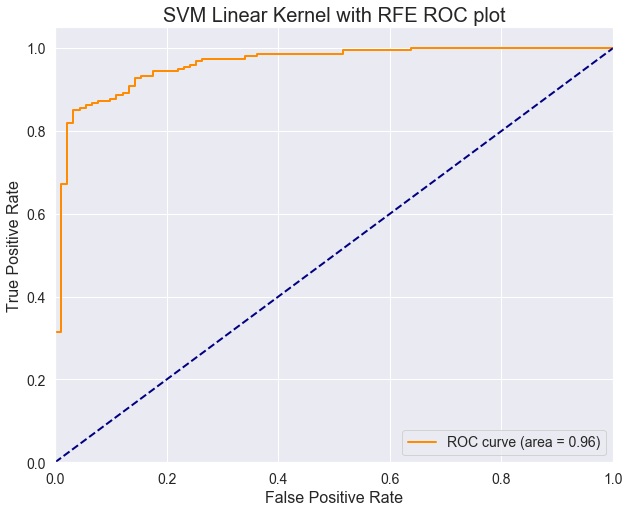

In [135]:
generate_roc_plot(false_positive_rate, true_positive_rate, title = "SVM Linear Kernel with RFE ROC plot")

Confusion matrix, without normalization
[[ 78  13]
 [ 16 204]]
(2, 2)


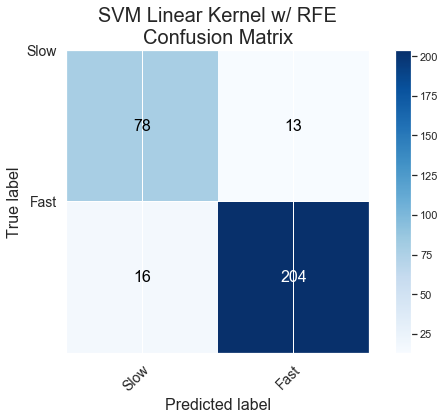

In [138]:
plot_confusion_matrix(y_true = y_test, y_pred = y_pred, classes = df2["ClearanceRate"], title = "SVM Linear Kernel w/ RFE\nConfusion Matrix")

In [139]:
# logistic regression -- lbgfs solver:

lrm = LogisticRegression(max_iter = 1000, C = 0.5).fit(x_train_rfs100, y_train)

y_scores = lrm.decision_function(x_test_rfs100)
y_pred = lrm.predict(x_test_rfs100)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Logistic Regression classifier AUC: ", roc_auc)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Logistic Regression classifier AUC:  0.9511988011988013
Accuracy:  0.8938906752411575


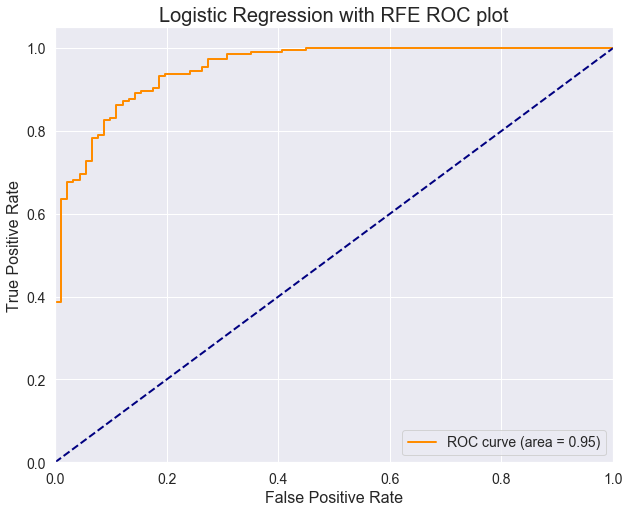

In [140]:
generate_roc_plot(false_positive_rate, true_positive_rate, title = "Logistic Regression with RFE ROC plot")

Confusion matrix, without normalization
[[ 74  17]
 [ 16 204]]
(2, 2)


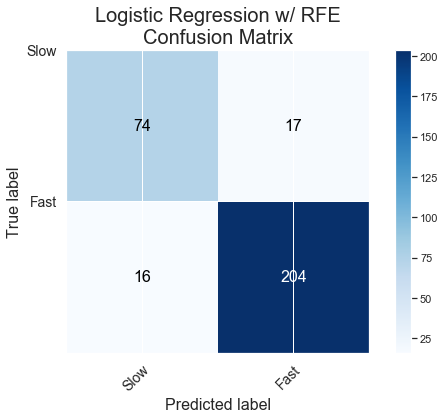

In [141]:
plot_confusion_matrix(y_true = y_test, y_pred = y_pred, classes = df2["ClearanceRate"], title = "Logistic Regression w/ RFE\nConfusion Matrix")
# cmap=plt.cm.Blues

In [142]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(solver = "svd").fit(x_train_rfs100, y_train)

y_scores = lda.decision_function(x_test_rfs100)
y_pred = lda.predict(x_test_rfs100)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("LDA classifier AUC: ", roc_auc)
print("Accuracy: ", accuracy_score(y_test, y_pred))

LDA classifier AUC:  0.9434065934065934
Accuracy:  0.8681672025723473


In [143]:
## Next try selecting top 50 features with RFE:

# Create the RFE object and rank each feature
svm = SVC(C = 0.5, kernel = "linear", gamma='scale').fit(x_train, y_train)
#lr = LogisticRegression(max_iter = 1000)

rfs50 = RFE(estimator=svm, n_features_to_select=50 ,step=25).fit(features, outputs)

rfs50.n_features_

50

In [144]:
x_train_rfs50 = x_train[:,rfs50.support_]
x_test_rfs50 = x_test[:,rfs50.support_]

print(x_train_rfs50.shape)
print(x_test_rfs50.shape)

(723, 50)
(311, 50)


In [146]:
# Random Forest:

rfc = RandomForestClassifier(n_estimators = 1000, bootstrap = True, max_depth = 8,
                            max_features = 'sqrt').fit(x_train_rfs50, y_train)

y_pred = rfc.predict(x_test_rfs50)
y_probs = rfc.predict_proba(x_test_rfs50)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probs[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Random Forest classifier AUC: ", roc_auc)

Random Forest classifier AUC:  0.8153346653346654


In [147]:
# SVM Linear kernel:

svm = SVC(C = 0.5, kernel = "linear", gamma='scale').fit(x_train_rfs50, y_train)

y_scores = svm.decision_function(x_test_rfs50)
y_pred = svm.predict(x_test_rfs50)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("SVM linar kernel classifier AUC: ", roc_auc)

SVM linar kernel classifier AUC:  0.9378121878121878


In [148]:
# logistic regression -- lbgfs solver:

lrm = LogisticRegression(max_iter = 1000, C = 0.5).fit(x_train_rfs50, y_train)

y_scores = lrm.decision_function(x_test_rfs50)
y_pred = lrm.predict(x_test_rfs50)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Logistic Regression classifier AUC: ", roc_auc)

Logistic Regression classifier AUC:  0.9362637362637363


    MODEL FEATURE INTERSECTION:

In [170]:
# Look at the interesection between the features for the best models for each dataset:
#m1_rfe_features = dfmean.iloc[:,1:-1].columns[rfs100.support_]
#m2_rfe_features = pd_impute.iloc[:,1:].columns[rfs100.support_]

np.intersect1d(m1_rfe_features, m2_rfe_features)

array(['PF3D7_0502400', 'PF3D7_0902600', 'PF3D7_1001000', 'PF3D7_1240400'],
      dtype=object)

    CROSS APPLYING CLASSIFICATION MODEL:
    
Try applying Model 2 (the classifier) to the in vitro (dataset 1) micro array data:

In [156]:
unperturbed_mask = df["Treatment"] == "UT"
df_xapply = df[unperturbed_mask]

In [157]:
df_xapply["Timepoint"] = df_xapply["Timepoint"].apply(time_convert)
df_xapply.shape

/Users/Natalie/miniconda3/envs/new_sk/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(136, 5546)

In [158]:
xapply_features = df_xapply[m2_rfe_features].to_numpy()
xapply_labels = df_xapply["DHA_IC50"].to_numpy()

print(xapply_features.shape)
print(xapply_labels.shape)

(136, 100)
(136,)


In [159]:
# apply best SVM Linear model to this data!

xapply_pred = svm_best.predict(xapply_features)

In [160]:
xapply_out = pd.DataFrame([xapply_labels, xapply_pred]).transpose()
xapply_out.columns = ["IC_50", "Predicted_Clearance"]
xapply_out["Predicted_Clearance"] = xapply_out["Predicted_Clearance"].replace(0, "Slow")
xapply_out["Predicted_Clearance"] = xapply_out["Predicted_Clearance"].replace(1, "Fast")

In [161]:
xapply_out["Predicted_Clearance"].value_counts()

Fast    128
Slow      8
Name: Predicted_Clearance, dtype: int64

In [163]:
xapply_out.groupby("Predicted_Clearance").median()

,IC_50
Predicted_Clearance,
Fast,1.5170
Slow,1.7735


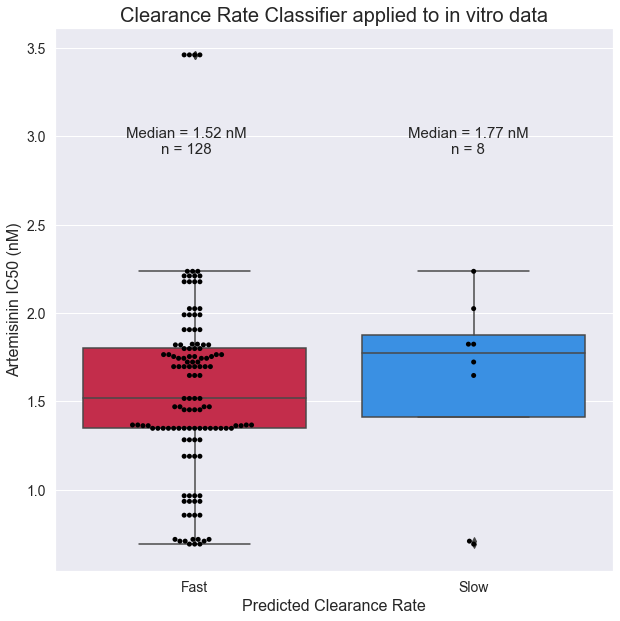

In [164]:
plt.figure(figsize = (10, 10))
my_palette = {"Fast": "crimson", "Slow": "dodgerblue"}
sns.boxplot(y = "IC_50", x = "Predicted_Clearance", data = xapply_out, palette = my_palette)
sns.swarmplot(y = "IC_50", x = "Predicted_Clearance", data = xapply_out, color = "black")
plt.xlabel('Predicted Clearance Rate', fontsize = 16)
plt.ylabel('Artemisinin IC50 (nM)', fontsize = 16)
plt.title("Clearance Rate Classifier applied to in vitro data", fontsize = 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.text(x = -0.03, y = 2.9, s = "Median = 1.52 nM\nn = 128", fontsize=15, ha = "center")
plt.text(x = 0.98, y = 2.9, s = "Median = 1.77 nM\nn = 8", fontsize=15, ha = "center")
plt.show()